In [26]:
!pip install memory-profiler


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [27]:
!pip install ipython


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [29]:
%load_ext memory_profiler

In [1]:
import pandas as pd
import numpy as np


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor


In [3]:
# Deep Learning Libraries
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM, GRU, Conv1D, MaxPooling1D, Flatten, Dense, RepeatVector, TimeDistributed
from keras.optimizers import Adam

In [4]:
# Prophet
from prophet import Prophet

C:\Users\PC\.venvs\venv_py_3_11\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [6]:

# Reading the Data
df = pd.read_csv("SPY_1min_historical_data_all.csv")
df.head()

,Datetime_aware,Datetime,Timezone,Open,High,Low,Close,Volume
0,2004-01-23 09:30:00-05:00,1/23/2004 9:30,US/Eastern,115.00,115.06,115.00,115.04,272200
1,2004-01-23 09:31:00-05:00,1/23/2004 9:31,US/Eastern,115.05,115.06,115.01,115.05,240200
2,2004-01-23 09:32:00-05:00,1/23/2004 9:32,US/Eastern,115.05,115.06,114.98,115.05,131900
3,2004-01-23 09:33:00-05:00,1/23/2004 9:33,US/Eastern,115.03,115.06,114.98,114.98,330800
4,2004-01-23 09:34:00-05:00,1/23/2004 9:34,US/Eastern,115.00,115.03,114.96,115.00,87000


In [12]:
df.columns

Index(['Datetime_aware', 'Datetime', 'Timezone', 'Open', 'High', 'Low',
       'Close', 'Volume'],
      dtype='object')

In [7]:
df_ohlcv= df.copy()

In [8]:
df_ohlcv['Datetime'] = pd.to_datetime(df_ohlcv['Datetime'], infer_datetime_format=True, errors='coerce')


C:\Users\PC\AppData\Local\Temp\ipykernel_6212\2018301030.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df_ohlcv['Datetime'] = pd.to_datetime(df_ohlcv['Datetime'], infer_datetime_format=True, errors='coerce')


In [9]:
df_ohlcv.head()

,Datetime_aware,Datetime,Timezone,Open,High,Low,Close,Volume
0,2004-01-23 09:30:00-05:00,2004-01-23 09:30:00,US/Eastern,115.00,115.06,115.00,115.04,272200
1,2004-01-23 09:31:00-05:00,2004-01-23 09:31:00,US/Eastern,115.05,115.06,115.01,115.05,240200
2,2004-01-23 09:32:00-05:00,2004-01-23 09:32:00,US/Eastern,115.05,115.06,114.98,115.05,131900
3,2004-01-23 09:33:00-05:00,2004-01-23 09:33:00,US/Eastern,115.03,115.06,114.98,114.98,330800
4,2004-01-23 09:34:00-05:00,2004-01-23 09:34:00,US/Eastern,115.00,115.03,114.96,115.00,87000


In [37]:
# Define the datetime you are searching for
search_datetime = pd.Timestamp("2013-06-24 09:30:00")  # OR use datetime.datetime()

# Filter the row where Datetime matches exactly
result = df.loc[df_ohlcv['Datetime'] == search_datetime]

# View the result
print(result)


                   Datetime_aware        Datetime    Timezone    Open    High  \
935632  2013-06-24 09:30:00-04:00  6/24/2013 9:30  US/Eastern  157.42  157.49   

           Low   Close   Volume  
935632  157.28  157.33  1904300  


In [10]:
df_ohlcv.columns

Index(['Datetime_aware', 'Datetime', 'Timezone', 'Open', 'High', 'Low',
       'Close', 'Volume'],
      dtype='object')

In [11]:
df_ohlcv.set_index('Datetime', inplace=True)

df_5min = df_ohlcv.resample('5T').agg({
    'Open': 'first',
    'High': 'max',
    'Low': 'min',
    'Close': 'last',
    'Volume': 'sum'
}).dropna()


C:\Users\PC\AppData\Local\Temp\ipykernel_6212\1520899949.py:3: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_5min = df_ohlcv.resample('5T').agg({


In [12]:
df_5min.head()

,Open,High,Low,Close,Volume
Datetime,,,,,
2004-01-23 09:30:00,115.00,115.06,114.96,115.00,1062100
2004-01-23 09:35:00,115.00,115.08,114.98,115.02,324300
2004-01-23 09:40:00,115.03,115.16,114.98,115.11,419500
2004-01-23 09:45:00,115.11,115.16,115.08,115.09,487000
2004-01-23 09:50:00,115.11,115.11,114.88,114.90,431100


In [14]:
df_5min.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [ ]:
#train test split
train, test = train_test_split(df_5min, test_size=0.2, shuffle=False)

In [15]:
models = {}
results = {}
forecast = {}

In [16]:
model = SARIMAX(df_5min['Open'], order=(1,1,1), seasonal_order=(0,1,1,12))
results['Open'] = model.fit()

C:\Users\PC\.venvs\venv_py_3_11\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\PC\.venvs\venv_py_3_11\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [17]:
forecast['Open'] = results['Open'].forecast(steps=6)

C:\Users\PC\.venvs\venv_py_3_11\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\PC\.venvs\venv_py_3_11\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [21]:
forecast['Open'].size

6

In [31]:
#delete unused variables
del df_ohlcv

In [ ]:
from pmdarima import auto_arima

stepwise_model = auto_arima(
    df_5min['close'],
    start_p=0, start_q=0,
    max_p=5, max_q=5,
    d=1, seasonal=False,
    trace=True, error_action='ignore', suppress_warnings=True
)

print(stepwise_model.summary())


In [42]:


for col in ['Open', 'High', 'Low','Close', 'Volume']:
    model = SARIMAX(df_5min[col], order=(1,1,1), seasonal_order=(0,1,1,12))
    results[col] = model.fit()
    forecast[col] = results[col].forecast(steps=6)


C:\Users\PC\.venvs\venv_py_3_11\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\PC\.venvs\venv_py_3_11\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\PC\.venvs\venv_py_3_11\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\PC\.venvs\venv_py_3_11\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exc

In [24]:
#memory management
%who_ls

['ARIMA',
 'Adam',
 'Conv1D',
 'Dense',
 'Flatten',
 'GRU',
 'GradientBoostingRegressor',
 'LSTM',
 'MaxPooling1D',
 'MinMaxScaler',
 'Prophet',
 'RandomForestRegressor',
 'RepeatVector',
 'SARIMAX',
 'Sequential',
 'TimeDistributed',
 'df',
 'df_5min',
 'df_ohlcv',
 'display',
 'forecast',
 'mean_squared_error',
 'model',
 'models',
 'np',
 'pd',
 'plt',
 'pydev_jupyter_vars',
 'remove_imported_pydev_package',
 'results',
 'sys',
 'tf',
 'train_test_split']

In [25]:
#memory management
import sys
from IPython.display import display
{var: sys.getsizeof(val) for var, val in globals().items()}


{'__name__': 57,
 '__doc__': 113,
 '__package__': 16,
 '__loader__': 16,
 '__spec__': 16,
 '__builtin__': 72,
 '__builtins__': 72,
 '_ih': 312,
 '_oh': 352,
 '_dh': 64,
 'In': 312,
 'Out': 352,
 'get_ipython': 64,
 'exit': 56,
 'quit': 56,
 'open': 152,
 '_': 376,
 '__': 3328,
 '___': 28,
 '__session__': 67,
 '_i': 75,
 '_ii': 174,
 '_iii': 72,
 '_i1': 87,
 'pd': 72,
 'np': 72,
 'sys': 72,
 'remove_imported_pydev_package': 152,
 '_pydevd_bundle': 72,
 'pydev_jupyter_vars': 72,
 '_i2': 434,
 'train_test_split': 152,
 'MinMaxScaler': 1688,
 'mean_squared_error': 152,
 'plt': 72,
 'ARIMA': 1688,
 'SARIMAX': 1688,
 'RandomForestRegressor': 1688,
 'GradientBoostingRegressor': 1688,
 '_i3': 272,
 'tf': 72,
 'Sequential': 1688,
 'LSTM': 1688,
 'GRU': 1688,
 'Conv1D': 1688,
 'MaxPooling1D': 1688,
 'Flatten': 1688,
 'Dense': 1688,
 'RepeatVector': 1688,
 'TimeDistributed': 1688,
 'Adam': 1688,
 '_i4': 86,
 'Prophet': 1688,
 '_i5': 100,
 '_exit_code': 28,
 '_i6': 131,
 'df': 559948890,
 '_6': 14

In [ ]:
import gc
gc.collect()


In [ ]:


# Preprocessing
df['Datetime'] = pd.to_datetime(df['Datetime'])
df.sort_values('Datetime', inplace=True)
df.set_index('Datetime', inplace=True)

# Feature Engineering
df['Close_Open'] = df['Close'] - df['Open']
data = df[['Close_Open']]

# Handle Missing Values (if any)
data = data.dropna()

data.head()


,Close_Open
Datetime,
2015-02-12,0.31
2015-02-13,0.19
2015-02-17,-0.31
2015-02-18,-0.06
2015-02-19,0.20


In [ ]:
df['Datetime'] = pd.to_datetime(df['Datetime'], format="%Y-%m-%d %H:%M:%S")


In [ ]:

# Scale Data
#scaler = MinMaxScaler()
#data['Close_Open'] = scaler.fit_transform(data['Close_Open'].values.reshape(-1, 1))

# Split Data
train_size = int(len(data) * 0.8)
train, test = data.iloc[:train_size], data.iloc[train_size:]

In [ ]:
train.head()

,Close_Open
Datetime,
2015-02-12,0.31
2015-02-13,0.19
2015-02-17,-0.31
2015-02-18,-0.06
2015-02-19,0.20


In [ ]:


# Function to create sequences for LSTMs, GRUs, TCNs
def create_sequences(data, seq_length):
    xs = []
    ys = []
    for i in range(len(data)-seq_length):
        x = data.iloc[i:(i+seq_length)].values
        y = data.iloc[i+seq_length, 0]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

seq_length = 30  # Adjust this based on your needs
X_train, y_train = create_sequences(train, seq_length)
X_test, y_test = create_sequences(test, seq_length)


print(X_train.shape)
print(X_train[0])
print(type(X_train))
print(X_train.dtype)

print(y_train.shape)
print(y_train[0])
print(type(y_train))
print(y_train.dtype)

(1980, 30, 1)
[[ 0.31]
 [ 0.19]
 [-0.31]
 [-0.06]
 [ 0.2 ]
 [-0.3 ]
 [-0.2 ]
 [ 0.35]
 [ 0.45]
 [ 0.67]
 [ 0.22]
 [ 0.42]
 [ 0.13]
 [ 0.07]
 [ 0.09]
 [-0.45]
 [ 0.17]
 [-0.45]
 [-0.22]
 [ 0.13]
 [-0.38]
 [ 0.23]
 [-0.03]
 [ 0.42]
 [-0.05]
 [-0.09]
 [-0.03]
 [ 0.45]
 [-0.53]
 [-0.05]]
<class 'numpy.ndarray'>
float64
(1980,)
-0.21000000000000085
<class 'numpy.ndarray'>
float64


In [ ]:
# Reshape for LSTMs, GRUs, TCNs
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [ ]:
# prompt: write code to inspect x_train generated after  X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
print(X_train.shape)
print(X_train[0])
print(type(X_train))
X_train.dtype


(1980, 30, 1)
[[ 0.31]
 [ 0.19]
 [-0.31]
 [-0.06]
 [ 0.2 ]
 [-0.3 ]
 [-0.2 ]
 [ 0.35]
 [ 0.45]
 [ 0.67]
 [ 0.22]
 [ 0.42]
 [ 0.13]
 [ 0.07]
 [ 0.09]
 [-0.45]
 [ 0.17]
 [-0.45]
 [-0.22]
 [ 0.13]
 [-0.38]
 [ 0.23]
 [-0.03]
 [ 0.42]
 [-0.05]
 [-0.09]
 [-0.03]
 [ 0.45]
 [-0.53]
 [-0.05]]
<class 'numpy.ndarray'>


dtype('float64')

In [ ]:
print(y_train.shape)
print(y_train[0])
print(type(y_train))
y_train.dtype

(1980,)
-0.21000000000000085
<class 'numpy.ndarray'>


dtype('float64')

In [ ]:
y_test.shape

(473,)

In [ ]:
train.shape


(2010, 1)

In [ ]:

# --- Model Definitions & Training ---

# . Random Forest
def train_random_forest(X_train, y_train, X_test):
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    return predictions

# . Gradient Boosting
def train_gradient_boosting(X_train, y_train, X_test):
    model = GradientBoostingRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    return predictions

# . LSTM
def train_lstm(X_train, y_train, X_test, seq_length):
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=(seq_length, 1)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    model.fit(X_train, y_train, epochs=5, verbose=0)  # Adjust epochs as needed
    predictions = model.predict(X_test)
    return predictions.flatten()

# . GRU
def train_gru(X_train, y_train, X_test, seq_length):
    model = Sequential()
    model.add(GRU(50, activation='relu', input_shape=(seq_length, 1)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    model.fit(X_train, y_train, epochs=5, verbose=0)  # Adjust epochs as needed
    predictions = model.predict(X_test)
    return predictions.flatten()

# . TCN (Temporal Convolutional Network)
def train_tcn(X_train, y_train, X_test, seq_length):
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(seq_length, 1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    model.fit(X_train, y_train, epochs=5, verbose=0)  # Adjust epochs as needed
    predictions = model.predict(X_test)
    return predictions.flatten()

# . Transformer (Simplified)
def train_transformer(X_train, y_train, X_test, seq_length):
    # Simplified Transformer (Self-Attention)
    embed_dim = 32  # Embedding dimension
    num_heads = 2   # Number of attention heads

    model = Sequential()
    model.add(Conv1D(embed_dim, 1, padding="same", input_shape=(seq_length, 1)))
    model.add(tf.keras.layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim))
    model.add(Flatten())
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    model.fit(X_train, y_train, epochs=5, verbose=0)

    predictions = model.predict(X_test)
    return predictions.flatten()


# . Prophet
def train_prophet(train_data, test_data):
    # Prepare data for Prophet
    train_prophet = train_data.reset_index()
    train_prophet.columns = ['ds', 'y']
    test_prophet = test_data.reset_index()
    test_prophet.columns = ['ds', 'y']

    model = Prophet()
    model.fit(train_prophet)
    future = model.make_future_dataframe(periods=len(test_prophet))
    forecast = model.predict(future)
    predictions = forecast['yhat'].iloc[-len(test_prophet):].values
    return predictions



In [ ]:
# --- Inverse Transform and Evaluate ---
def inverse_transform(predictions, scaler):
    if isinstance(predictions, pd.Series):
        predictions = predictions.values
    return scaler.inverse_transform(predictions.reshape(-1, 1)).flatten()

In [ ]:
def calculate_rmse(predictions, actual):
    return np.sqrt(mean_squared_error(actual, predictions))

In [ ]:
rf_predictions = train_random_forest(X_train.reshape(X_train.shape[0], -1), y_train, X_test.reshape(X_test.shape[0], -1))

In [ ]:
gb_predictions = train_gradient_boosting(X_train.reshape(X_train.shape[0], -1), y_train, X_test.reshape(X_test.shape[0], -1))

In [ ]:
#rf_predictions = inverse_transform(rf_predictions, scaler)
#gb_predictions = inverse_transform(gb_predictions, scaler)

#y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
#print(f" y_test_original_shape: {y_test_original.shape}")
print(f"rf_predictions_shape: {rf_predictions.shape}")
print(f"gb_predictions_shape: {gb_predictions.shape}")

rf_predictions_shape: (473,)
gb_predictions_shape: (473,)


In [ ]:
print(f"Random Forest RMSE: {calculate_rmse(rf_predictions, y_test)}")
print(f"Gradient Boosting RMSE: {calculate_rmse(gb_predictions, y_test)}")

Random Forest RMSE: 2.00632482528265
Gradient Boosting RMSE: 2.0468073425323983


In [ ]:
lstm_predictions = train_lstm(X_train, y_train, X_test, seq_length)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


In [ ]:
lstm_predictions.shape

(473,)

In [ ]:
gru_predictions = train_gru(X_train, y_train, X_test, seq_length)

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


In [ ]:
gru_predictions.shape

(473,)

In [ ]:
tcn_predictions = train_tcn(X_train, y_train, X_test, seq_length)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


In [ ]:
tcn_predictions.shape

(473,)

In [ ]:
y_test.shape

(473,)

In [ ]:
print(f"LSTM RMSE: {calculate_rmse(lstm_predictions, y_test)}")
print(f"GRU RMSE: {calculate_rmse(gru_predictions, y_test)}")
print(f"TCN RMSE: {calculate_rmse(tcn_predictions, y_test)}")

LSTM RMSE: 1.9532009941498052
GRU RMSE: 1.9460739932994435
TCN RMSE: 1.9757790260906107


In [ ]:
#transformer_predictions = train_transformer(X_train, y_train, X_test, seq_length)

In [ ]:
prophet_predictions = train_prophet(train, test)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7p0d15lv/l_i_5yjr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7p0d15lv/q2grj2za.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25761', 'data', 'file=/tmp/tmp7p0d15lv/l_i_5yjr.json', 'init=/tmp/tmp7p0d15lv/q2grj2za.json', 'output', 'file=/tmp/tmp7p0d15lv/prophet_model8jq0shoq/prophet_model-20250227210711.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:07:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:07:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
print(f"Prophet RMSE: {calculate_rmse(prophet_predictions,test)}")

Prophet RMSE: 1.9611380538498429


In [ ]:


#arima_predictions = inverse_transform(arima_predictions, scaler)
#sarima_predictions = inverse_transform(sarima_predictions, scaler)



#lstm_predictions = inverse_transform(lstm_predictions, scaler)
#gru_predictions = inverse_transform(gru_predictions, scaler)
#tcn_predictions = inverse_transform(tcn_predictions, scaler)
#transformer_predictions = inverse_transform(transformer_predictions, scaler)
#prophet_predictions = inverse_transform(prophet_predictions, scaler)

#print(f"Transformer RMSE: {calculate_rmse(transformer_predictions, y_test_original)}")




 y_test_original_shape: (472,)
rf_predictions_shape: (472,)
gb_predictions_shape: (472,)
ARIMA RMSE: 0.13633590459676515
SARIMA RMSE: 0.1355154215408435
Random Forest RMSE: 869715.7491909842
Gradient Boosting RMSE: 1102719.4149733803
LSTM RMSE: 0.11673722486245705
GRU RMSE: 0.11651514838516523
TCN RMSE: 0.11684643930005321
Prophet RMSE: 0.11600568313751676


In [ ]:
test.head()

,Close_Open
Datetime,
2023-02-07,0.664695
2023-02-08,0.244826
2023-02-09,0.108811
2023-02-10,0.353046
2023-02-13,0.395624


In [ ]:
y_test_original[:5]

array([-0.9 ,  0.54,  0.45, -2.2 , -1.41])

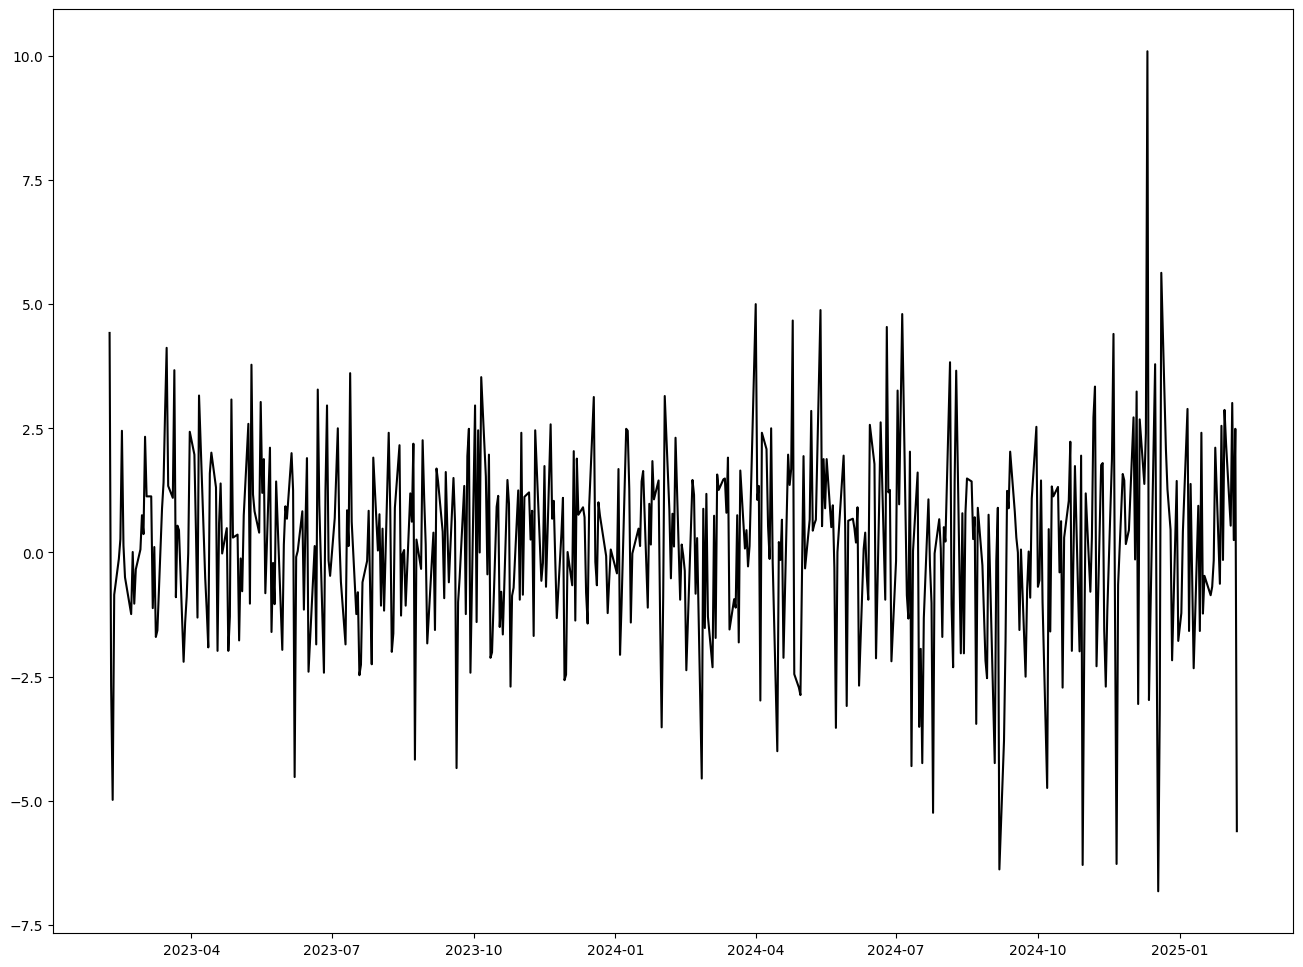

In [ ]:
# --- Plotting the Results ---
plt.figure(figsize=(16, 12))

#plot original test
plt.plot(test.index[:],test['Close_Open'], label='Original Test', color='black')

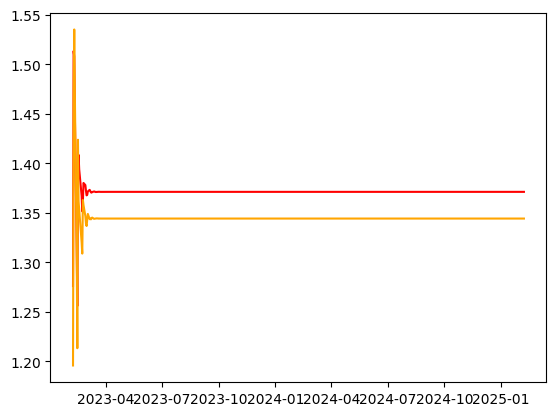

In [ ]:


# Plotting the predictions
plt.plot(test.index[:len(arima_predictions)], arima_predictions, label='ARIMA', color='red')
plt.plot(test.index[:len(sarima_predictions)], sarima_predictions, label='SARIMA', color='orange')


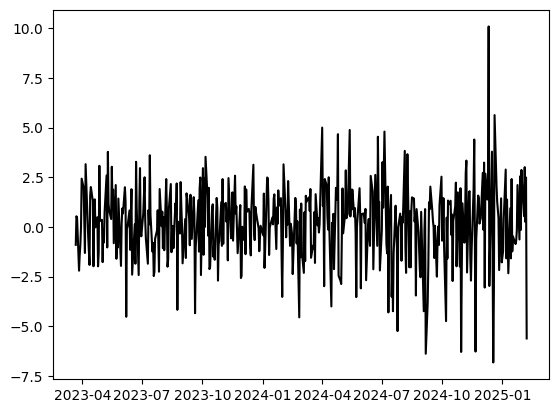

In [ ]:
plt.plot(test.index[seq_length:],y_test,label="Original",color = "black")

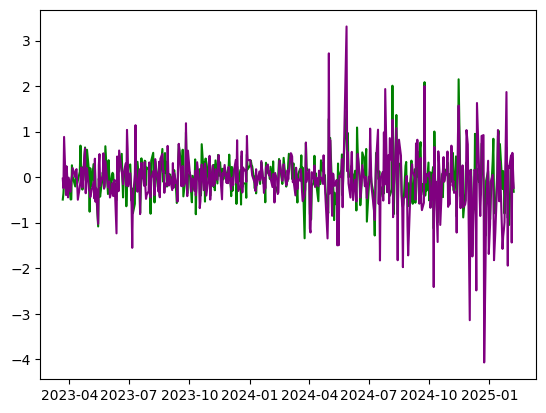

In [ ]:
plt.plot(test.index[seq_length:], rf_predictions, label='Random Forest', color='green') # Shift index for sequence models
plt.plot(test.index[seq_length:], gb_predictions, label='Gradient Boosting', color='purple') # Shift index for sequence models


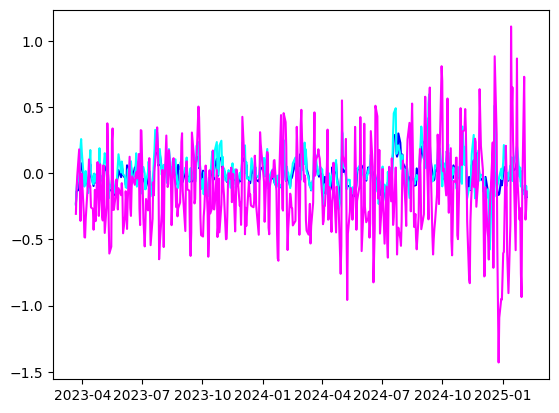

In [ ]:
plt.plot(test.index[seq_length:], lstm_predictions, label='LSTM', color='blue') # Shift index for sequence models
plt.plot(test.index[seq_length:], gru_predictions, label='GRU', color='cyan') # Shift index for sequence models
plt.plot(test.index[seq_length:], tcn_predictions, label='TCN', color='magenta') # Shift index for sequence models
#plt.plot(test.index[seq_length:], transformer_predictions, label='Transformer', color='brown') # Shift index for sequence models


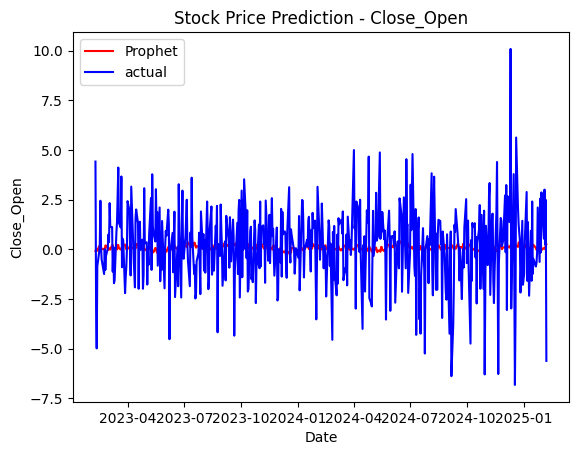

In [ ]:
plt.plot(test.index[:len(prophet_predictions)], prophet_predictions, label='Prophet', color='red')
plt.plot(test.index[:len(prophet_predictions)], test['Close_Open'], label='actual', color='blue')
plt.title('Stock Price Prediction - Close_Open')
plt.xlabel('Date')
plt.ylabel('Close_Open')
plt.legend()
plt.show()